In [1]:
import pandas as pd , os , numpy as np, glob
from utils import *
from sklearn.preprocessing import Imputer , LabelEncoder , MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fpath = glob.glob(os.path.join(os.getcwd(),'DA/life*'))

In [3]:
df = pd.read_sas(fpath[0])
df['target'] = df['premium'].apply(lambda x: int(x>0)); df.drop('premium', axis=1, inplace=True);

In [4]:
cat, num = sum_cat_num(df, 'target')

             risk_score       gender num_public_record_items  \
count             28749          NaN                   28749   
mean            808.773          NaN                 1.18213   
std             155.635          NaN                 3.00736   
min                 222          NaN                       0   
25%                 720          NaN             2.8915e-318   
50%                 863          NaN             2.7225e-316   
75%                 931          NaN                       1   
max                 994          NaN                      65   
counts            28749        28749                   28749   
uniques             721            4                   18547   
missing               0            0                       0   
missing_perc         0%           0%                      0%   
types           numeric  categorical                 numeric   

             age_most_rec_pub_record collection_items bankruptcy_prior  \
count                        

In [5]:

df['target'].value_counts()

0    27887
1      862
Name: target, dtype: int64

In [6]:
df_yes = df.loc[df.target==1]  # oversampling 
df_no = df.loc[df.target==0]
np.random.seed(57)
df_no_ = df_no.loc[np.random.rand(27887) <= (4885/27887.0)]
df_data = pd.concat([df_yes, df_no_])

In [7]:
df_data.shape     #oversamping target/pop = 0.1491

(5781, 50)

In [8]:
df_imp = feature_importance(df_data, num,cat)

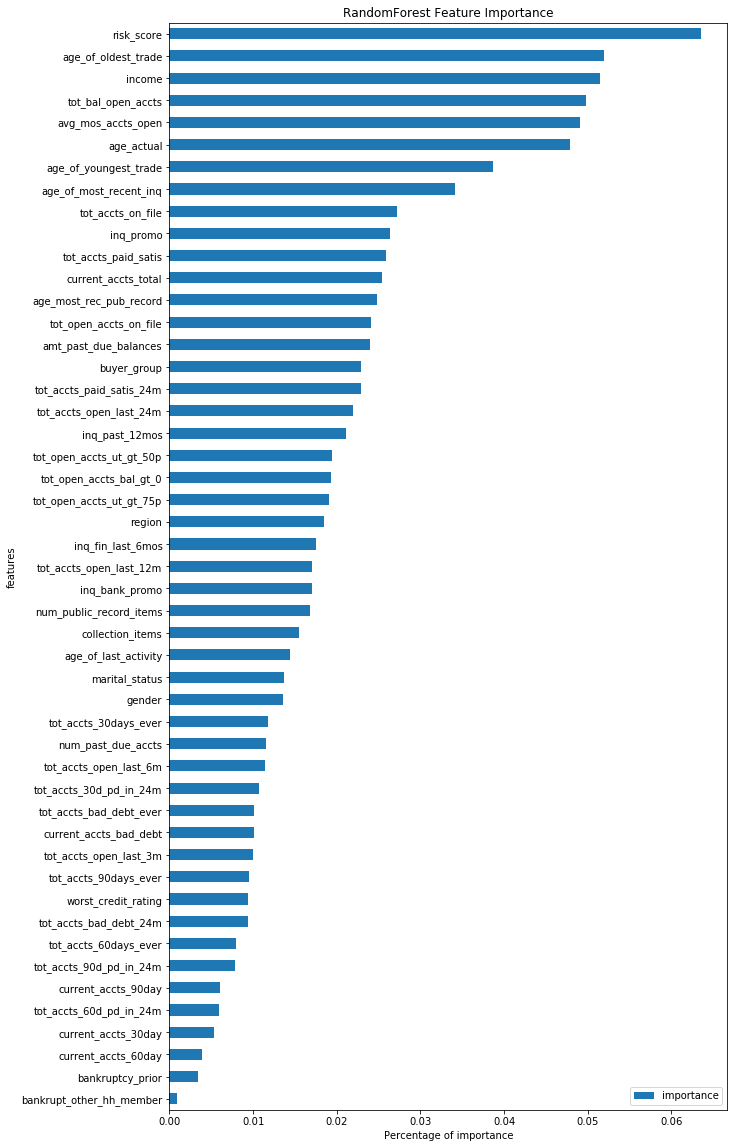

In [9]:
df_imp.plot(kind='barh', x='features', y='importance', figsize=(10,20))
plt.title('RandomForest Feature Importance')
plt.xlabel('Percentage of importance')

In [10]:
var_imp = df_imp['features'].loc[df_imp.importance >=0.03].tolist()

In [11]:
cat, num = sum_cat_num(df_data[var_imp], y=None)

             age_of_most_recent_inq age_of_youngest_trade age_actual  \
count                          5781                  5781       5038   
mean                        4.61754               15.1948    34.9811   
std                         5.75917               19.4457    13.6428   
min                               0                     0         18   
25%                               0                     4         24   
50%                               2                     9         31   
75%                               7                    19         43   
max                              24                   305         92   
counts                         5781                  5781       5038   
uniques                          25                   132       3300   
missing                           0                     0        743   
missing_perc                     0%                    0%     12.85%   
types                       numeric               numeric    num

In [12]:
X , y = df_data[num].values,  df_data['target'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y,shuffle=True,random_state=57,test_size=0.3)  

In [14]:
pl = Pipeline([
    ('impute', Imputer(strategy='median')),
    ('scaling', MinMaxScaler()),
    #('poly', poly),
    ('clf', LogisticRegression())
])

In [15]:
pl.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('impute', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [16]:
pl.score(X_test, y_test)

0.85072046109510091